# Stats Project 6: Time Series Analysis

The statistics concept for this week is time series analysis. Since the electronics focus this week is on learning a completely new system (Cypress 5LP) I thought we'd use something completely different for statistics!

Let's grab some data from the Internet and apply time series analysis to that. Of course you can also apply the same concept to data you collect in the lab from any system you like, or data you collect in any other way.

Let's explore an example dealing with Weather! We are going to use time series of [Arctic Oscillation (AO)](http://en.wikipedia.org/wiki/Arctic_oscillation) and [North Atlantic Oscillation (NAO)](http://en.wikipedia.org/wiki/North_Atlantic_oscillation) data sets. If you're interested you can find another approach to this same data set described [here](http://earthpy.org/pandas-basics.html) (this is where I got the idea of using the AO and NAO data sets, as well as the basic intro to time series). 


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import pymc3 as pm
import arviz as az

pd.set_option('display.max_rows',15) # this limit maximum numbers of rows

In [3]:
#
# Grab some data from noaa about the AO. This actually pulls the live data from noaa.
#
url="http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii"
dfAO=pd.read_csv(url, header=None, names=['year','month','AOValue'], delim_whitespace=True)
dfAO['day'] = 1
dfAO.head()

,year,month,AOValue,day
0,1950,1,-0.060310,1
1,1950,2,0.626810,1
2,1950,3,-0.008127,1
3,1950,4,0.555100,1
4,1950,5,0.071577,1


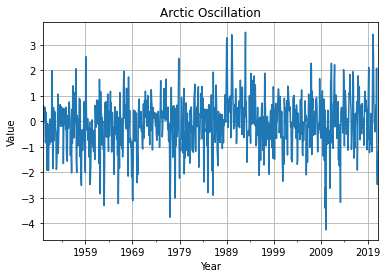

In [4]:
dates = pd.to_datetime(dfAO[['year','month','day']])
AO = pd.Series(dfAO.AOValue.values, index=dates)
AO.plot()

plt.title('Arctic Oscillation')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()

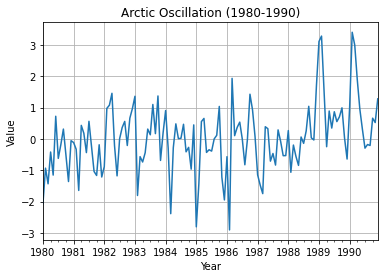

In [5]:
#
# you can zoom in!
#

AO['1980':'1990'].plot()
plt.title('Arctic Oscillation (1980-1990)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()

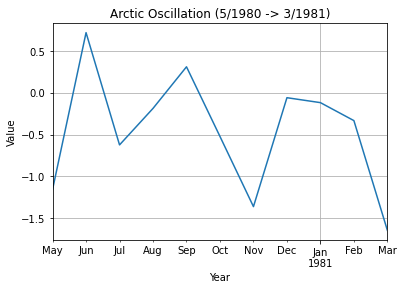

In [6]:
#
# or even more
#
AO['1980-05':'1981-03'].plot()
plt.title('Arctic Oscillation (5/1980 -> 3/1981)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()

In [7]:
url="http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii"
dfNAO=pd.read_csv(url, header=None, names=['year','month','NAOValue'], delim_whitespace=True)
dfNAO['day'] = 1
dfNAO.head()

,year,month,NAOValue,day
0,1950,1,0.92,1
1,1950,2,0.40,1
2,1950,3,-0.36,1
3,1950,4,0.73,1
4,1950,5,-0.59,1


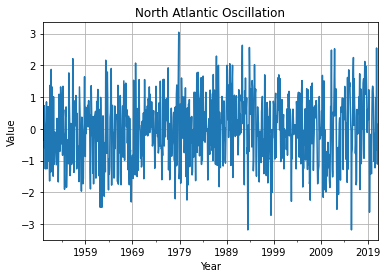

In [8]:
dates = pd.to_datetime(dfNAO[['year','month','day']])
NAO = pd.Series(dfNAO.NAOValue.values, index=dates)
NAO.plot()

plt.title('North Atlantic Oscillation')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()

In [9]:
aonao = pd.DataFrame({'AO' : AO, 'NAO' : NAO})
aonao.head()

,AO,NAO
1950-01-01,-0.060310,0.92
1950-02-01,0.626810,0.40
1950-03-01,-0.008127,-0.36
1950-04-01,0.555100,0.73
1950-05-01,0.071577,-0.59


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

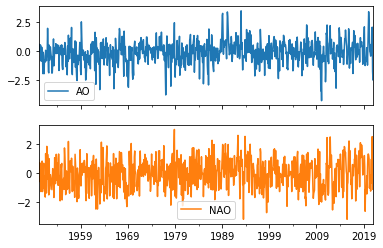

In [10]:
aonao.plot(subplots=True)


We can add new columns to our new DataFrame

In [11]:
aonao['Diff'] = aonao.AO - aonao.NAO
aonao.head()

,AO,NAO,Diff
1950-01-01,-0.060310,0.92,-0.980310
1950-02-01,0.626810,0.40,0.226810
1950-03-01,-0.008127,-0.36,0.351872
1950-04-01,0.555100,0.73,-0.174900
1950-05-01,0.071577,-0.59,0.661577


And when we're done, we can delete it:

In [12]:
del aonao['Diff']
aonao.head()

,AO,NAO
1950-01-01,-0.060310,0.92
1950-02-01,0.626810,0.40
1950-03-01,-0.008127,-0.36
1950-04-01,0.555100,0.73
1950-05-01,0.071577,-0.59


Also, we can get summary statistics using 'describe'

In [13]:
aonao.describe()

,AO,NAO
count,854.000000,854.000000
mean,-0.098747,-0.000749
std,1.016195,1.021760
min,-4.265700,-3.180000
25%,-0.651515,-0.750000
50%,-0.039931,0.058263
75%,0.492130,0.720000
max,3.495300,3.040000


# Resampling

Sometimes, especially when the data has a lot of noise, it's useful to "resample" by time averaging. This is pretty easy as illustrated below

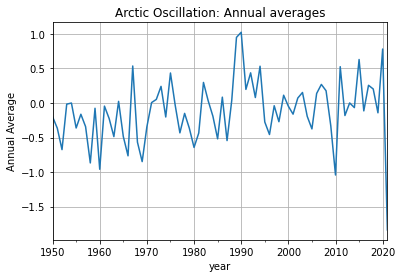

In [14]:
AO_mm = AO.resample('A').mean()  # resample "annually" (A) by taking the mean of each year
AO_mm.plot()
plt.title("Arctic Oscillation: Annual averages")
plt.xlabel("year")
plt.ylabel("Annual Average")
plt.grid()

You can also look at max and min annually

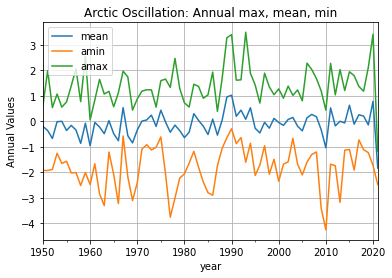

In [15]:
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm.plot()
plt.title("Arctic Oscillation: Annual max, mean, min")
plt.xlabel("year")
plt.ylabel("Annual Values")
plt.title("Arctic Oscillation: Annual max, mean, min")

plt.grid()

Text(0.5, 0, 'year')

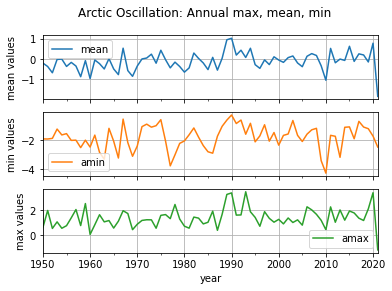

In [16]:
axes=AO_mm.plot(subplots=True) # same idea with subplots
plt.suptitle("Arctic Oscillation: Annual max, mean, min")
axes[0].set_ylabel("mean values")
axes[0].grid()
axes[1].set_ylabel("min values")
axes[1].grid()
axes[2].set_ylabel("max values")
axes[2].grid()
plt.xlabel("year")


You can also calculate rolling averages, or correlations

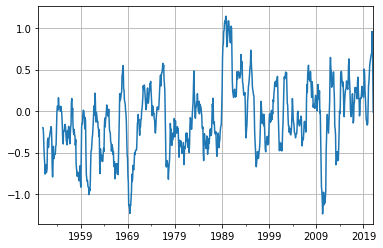

In [17]:
AO.rolling(window=12).mean().plot()
plt.grid()

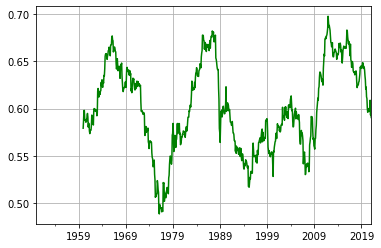

In [18]:
AO.rolling(window=120).corr(other=NAO).plot(style='-g')
plt.grid()


 The Pearson correlation coefficient is a measure of 
 the degree to which two random variable vary in the same way

[Wiki Article: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)


In [19]:
aonao.corr() # display the Pearson correlation between AO and NAO

,AO,NAO
AO,1.000000,0.606277
NAO,0.606277,1.000000


## Simple Linear Trend analysis

Now, suppose we want to determine the long term "trend" in data like this? We could propose a linear model with some kind of gaussian "noise". Let's use Bayesian inference to determine the parameters!

In [23]:
rollingMean = AO.rolling(window=12).mean()        # compute rolling mena
rollingMean = rollingMean[~np.isnan(rollingMean)] # remove the NaN values
firstTime = rollingMean.index.values[0]           # get the first timestamp
days = (rollingMean.index.values - firstTime).astype(np.int)/(1e9*24*3600) # get days since first time.


Text(0.5, 1.0, 'scaled AO')

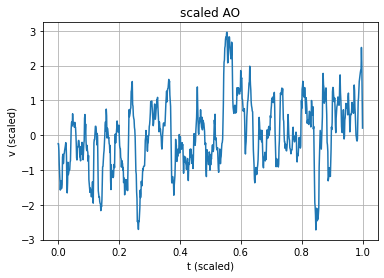

In [24]:
#
# Now rescale time and values for analyis
#

t = days/max(days) # rescale time, 0-1
v = (rollingMean - rollingMean.mean())/rollingMean.std() # rescale v
plt.plot(t,v)
plt.grid()
plt.xlabel('t (scaled)')
plt.ylabel('v (scaled)')
plt.title('scaled AO')


In [25]:
#
# Now use Bayesian update to estimate paramaters
#

with pm.Model() as rolling_model:
    
    m = pm.HalfCauchy("m",2) # rough prior
    b = pm.Normal("b",mu=0,sigma=3)
    s = pm.HalfCauchy("s",2)
    
    y = m*t + b
    
    out=pm.Normal("out",mu=y,sigma=s,observed=v)
    trace=pm.sample(1000, return_inferencedata=True)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, b, m]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
The acceptance probability does not match the target. It is 0.8952285300041312, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,hdi_3%,hdi_97%
b,-0.630,0.065,-0.747,-0.504
m,1.259,0.112,1.052,1.465
s,0.932,0.023,0.889,0.973


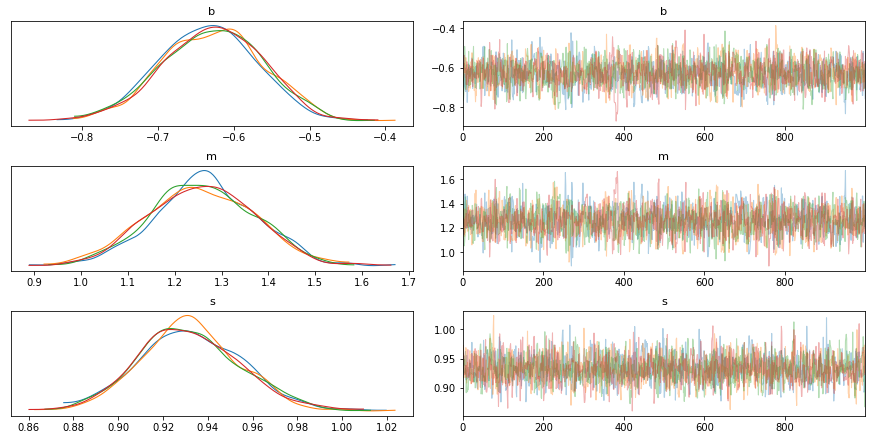

In [26]:
az.plot_trace(trace)
az.summary(trace, kind="stats")

In [27]:
with rolling_model:
    ppc = pm.sample_posterior_predictive(trace, var_names=['m','b','out'])

In [28]:
ppc.keys()

dict_keys(['m', 'b', 'out'])

In [29]:
ppc['m'].shape, ppc['b'].shape, ppc['out'].shape

((4000,), (4000,), (4000, 843))

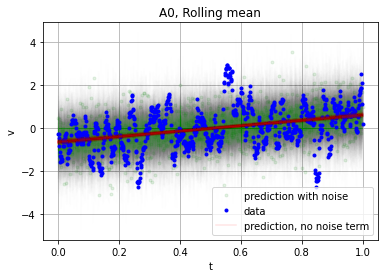

In [30]:
for j in range(1,200):
    plt.plot(t, ppc['out'][j], 'g-', alpha=0.005)

plt.plot(t, ppc['out'][0], 'g.', alpha=0.1, label="prediction with noise")

plt.plot(t, v, 'b.', label="data")

for j in range(1,200):
    m = ppc['m'][j]
    b = ppc['b'][j]
    y = m*t + b

    plt.plot(t, y, 'r-', alpha=0.01)

m = ppc['m'][0]
b = ppc['b'][0]
y = m*t + b


plt.plot(t, y, 'r-', alpha=0.1, label="prediction, no noise term")
plt.title("A0, Rolling mean")
plt.xlabel("t")
plt.ylabel("v")
plt.legend()
plt.grid()

There are many complex ways to make inferences from time series data! This notebook just scratches the surface of what's possible. If you're interested in pursuing this further you might consider these packages/ideas:

* [sktime](https://github.com/alan-turing-institute/sktime)
* [sktime-dl](https://github.com/sktime/sktime-dl)
* [statsmodels-tsa](https://www.statsmodels.org/stable/tsa.html)
* [pymc3-prophet](https://www.ritchievink.com/blog/2018/10/09/build-facebooks-prophet-in-pymc3-bayesian-time-series-analyis-with-generalized-additive-models/)

That's it for us with time series.

Stats Exercise: Find some data on the internet that represents a time series. Apply the same concepts illustrated in this notebook to your data set. It could be weather, finanical, governmental, sports, whatever! Just show me that you can grab some data from the Internet, and analyze it as a time series. You don't *have* to use pymc3, just do some analysis that makes sense for your data.

Here are some possible sources of data:

* [datasets for good](https://github.com/shreyashankar/datasets-for-good)
* [datahub](https://datahub.io/collections)
* [data.gov](https://www.data.gov)
* [kaggle](https://www.kaggle.com/datasets)
